## 表数据 

### fi3

In [2]:
import motmetrics as mm
import pandas as pd 
import numpy as np 

test = mm.io.loadtxt("./DataSource/Track/my_fi3/results.txt")
ori = mm.io.loadtxt("./DataSource/Track/ori_fi3/results.txt")[:len(test)]
gt = mm.io.loadtxt('/home/zlj/Excavator_ReID/data_visable/DataSource/Track/my_fi3/gt.txt')
acc1 = mm.utils.compare_to_groundtruth(gt, test, distth=0.5)
acc2 = mm.utils.compare_to_groundtruth(gt, ori, distth=0.5)
mh = mm.metrics.create()

metrics = mm.metrics.motchallenge_metrics
metrics
summary1 = mh.compute(acc1, metrics=['mota','idf1','num_switches'])
summary2 = mh.compute(acc2, metrics=['mota','idf1','num_switches'])
summary = pd.concat([summary1, summary2], axis=0)
summary

,mota,idf1,num_switches
0,0.999547,0.864359,18
0,0.996853,0.766662,45


### fi9

In [3]:
test = mm.io.loadtxt("./DataSource/Track/my_fi9/results.txt")
ori = mm.io.loadtxt("./DataSource/Track/ori_fi9/results.txt")[:len(test)]
gt = mm.io.loadtxt('/home/zlj/Excavator_ReID/data_visable/DataSource/Track/my_fi9/gt.txt')
acc1 = mm.utils.compare_to_groundtruth(gt, test, distth=0.5)
acc2 = mm.utils.compare_to_groundtruth(gt, ori, distth=0.5)
mh = mm.metrics.create()

metrics = mm.metrics.motchallenge_metrics
metrics
summary1 = mh.compute(acc1, metrics=['mota','idf1','num_switches'])
summary2 = mh.compute(acc2, metrics=['mota','idf1','num_switches'])
summary = pd.concat([summary1, summary2], axis=0)
summary

,mota,idf1,num_switches
0,0.999398,0.880648,8
0,0.956099,0.646461,131


### fi15

In [4]:
test = mm.io.loadtxt("./DataSource/Track/my_fi15/results.txt")
ori = mm.io.loadtxt("./DataSource/Track/ori_fi15/results.txt")[:len(test)]
gt = mm.io.loadtxt('/home/zlj/Excavator_ReID/data_visable/DataSource/Track/my_fi15/gt.txt')
acc1 = mm.utils.compare_to_groundtruth(gt, test, distth=0.5)
acc2 = mm.utils.compare_to_groundtruth(gt, ori, distth=0.5)
mh = mm.metrics.create()

metrics = mm.metrics.motchallenge_metrics
metrics
summary1 = mh.compute(acc1, metrics=['mota','idf1','num_switches'])
summary2 = mh.compute(acc2, metrics=['mota','idf1','num_switches'])
summary = pd.concat([summary1, summary2], axis=0)
summary

,mota,idf1,num_switches
0,0.998874,0.780988,9
0,0.897686,0.714822,186


### fi30

In [5]:
test = mm.io.loadtxt("./DataSource/Track/my_fi30/results.txt")
ori = mm.io.loadtxt("./DataSource/Track/ori_fi30/results.txt")[:len(test)]
gt = mm.io.loadtxt('/home/zlj/Excavator_ReID/data_visable/DataSource/Track/my_fi30/gt.txt')
acc1 = mm.utils.compare_to_groundtruth(gt, test, distth=0.5)
acc2 = mm.utils.compare_to_groundtruth(gt, ori, distth=0.5)
mh = mm.metrics.create()

metrics = mm.metrics.motchallenge_metrics
metrics
summary1 = mh.compute(acc1, metrics=['mota','idf1','num_switches'])
summary2 = mh.compute(acc2, metrics=['mota','idf1','num_switches'])
summary = pd.concat([summary1, summary2], axis=0)
summary

,mota,idf1,num_switches
0,0.987667,0.914406,50
0,0.873952,0.705476,145


## 绘制跟踪和GT图

### fi3

/tmp/ipykernel_3107591/2640915170.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("hsv")


<module 'matplotlib.pyplot' from '/home/zlj/Excavator_ReID/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

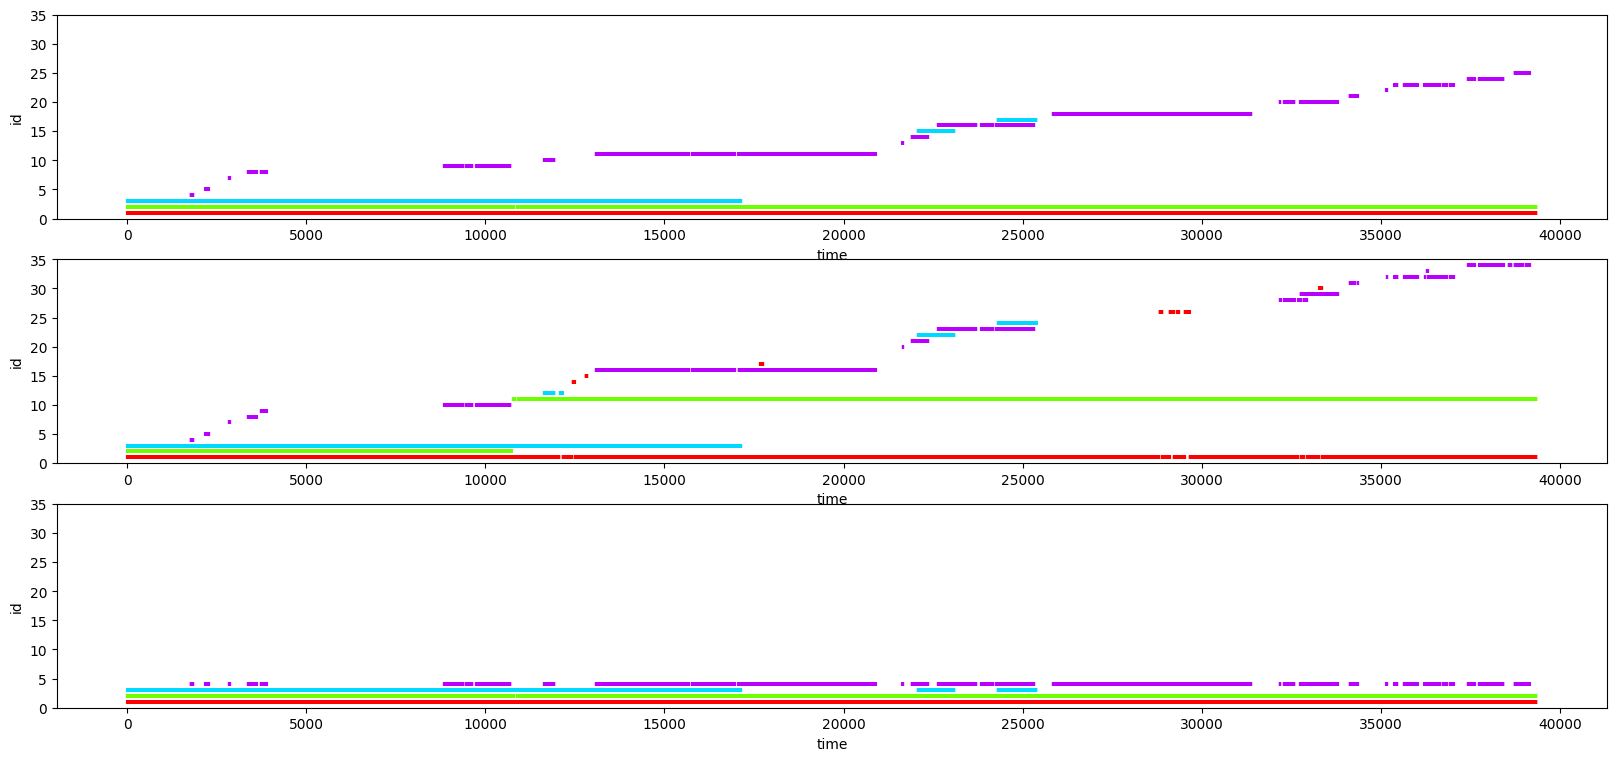

In [13]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
test_array = np.loadtxt('./DataSource/Track/my_fi3/results.txt', delimiter=',')
ori_array = np.loadtxt('./DataSource/Track/ori_fi3/results.txt', delimiter=',')[:len(test_array)]
gt_array = np.loadtxt('./DataSource/Track/my_fi3/gt.txt', delimiter=',')

cmap = get_cmap("hsv")
fig, ax = plt.subplots(3,1, figsize=(20, 9))
colors = cmap(np.linspace(0, 0.8, 4))
for id_, color in zip([1.0, 2.0, 3.0, 4.0], colors):
    filtr = gt_array[:, 1] == id_
    ax[2].scatter(gt_array[filtr, 0], gt_array[filtr, 1], marker='|', color=color, s=5)

for id_, color in zip([[1.0], \
                        [2.0], \
                        [3.0, 17.0, 15.0],\
                        [4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 16.0,18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]], colors):
    filtr = np.isin(test_array[:, 1], id_)
    ax[0].scatter(test_array[filtr, 0], test_array[filtr, 1], marker='|', color=color, s=5)

for id_, color in zip([[1.0, 14., 15., 17., 26.,30.],
                        [2.0, 11.],
                        [3., 12., 22., 24.],
                        [4., 5., 7., 8., 9., 10., 16., 20., 21., 23., 28., 29., 31., 32., 33., 34.]], colors):
    filtr = np.isin(ori_array[:, 1], id_)
    ax[1].scatter(ori_array[filtr, 0], ori_array[filtr, 1], marker='|', color=color, s=5)

for i in range(3): 
    ax[i].set_xlabel("time")
    ax[i].set_ylabel("id")
    ax[i].set_ylim(0, 35)
plt

### fi9

/tmp/ipykernel_3107591/1067832801.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("hsv")


<module 'matplotlib.pyplot' from '/home/zlj/Excavator_ReID/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

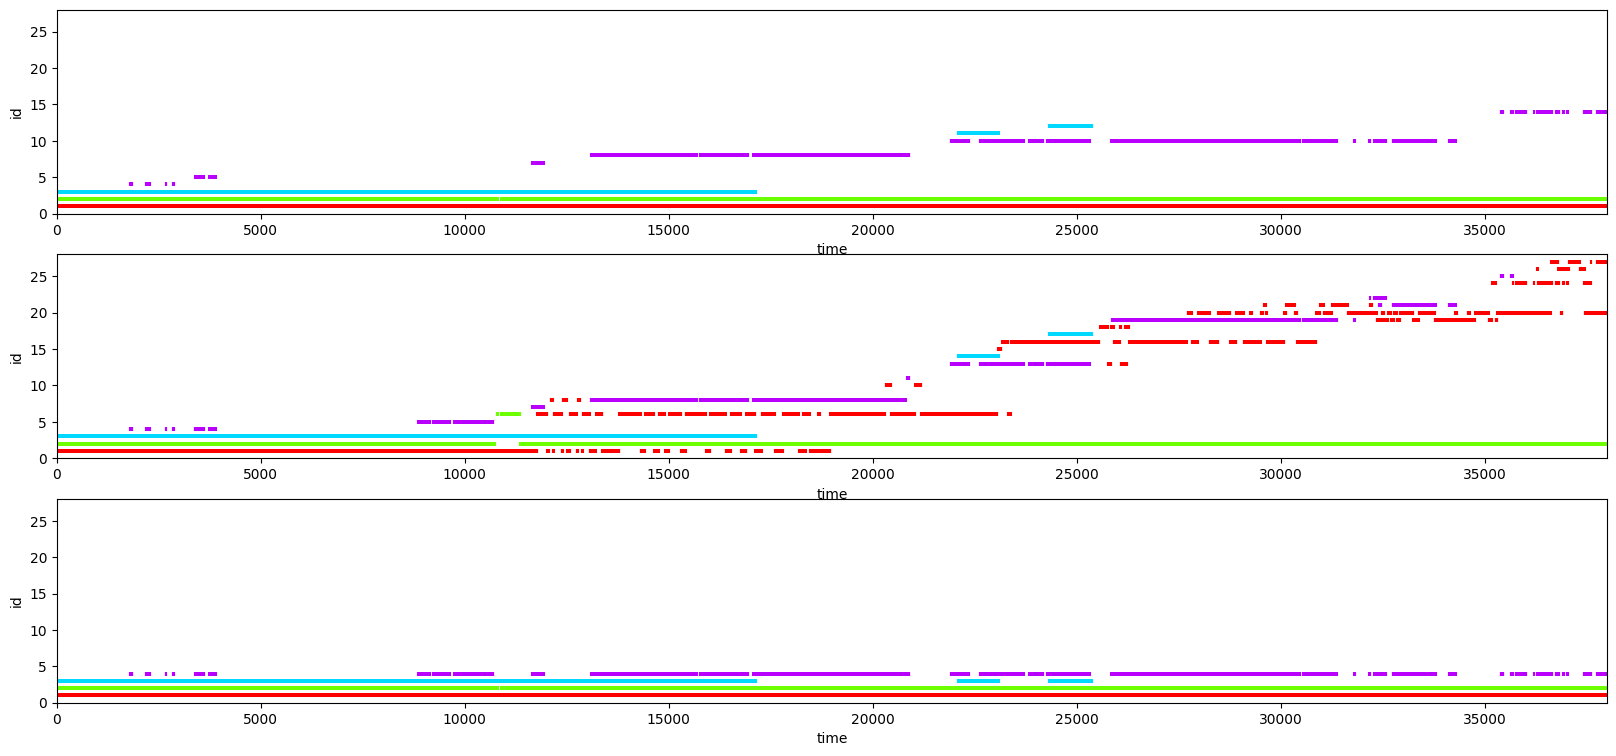

In [20]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
test_array = np.loadtxt('./DataSource/Track/my_fi9/results.txt', delimiter=',')
ori_array = np.loadtxt('./DataSource/Track/ori_fi9/results.txt', delimiter=',')
gt_array = np.loadtxt('./DataSource/Track/my_fi9/gt.txt', delimiter=',')

cmap = get_cmap("hsv")
fig, ax = plt.subplots(3,1, figsize=(20, 9))
colors = cmap(np.linspace(0, 0.8, 4))
# 有ID混淆
for id_, color in zip([1.0, 2.0, 3.0, 4.0], colors):
    gt_range = gt_array[:12100]
    filtr = gt_range[:, 1] == id_
    ax[2].scatter(gt_range[filtr, 0], gt_range[filtr, 1], marker='|', color=color, s=5)

for id_, color in zip([1.0, 2.0, 4.0, 3.0], colors):
    gt_range = gt_array[12100:]
    if id_ == 3.0:
        filtr = gt_range[:, 1] == id_
        gt_range[filtr, 1] = 4.
        ax[2].scatter(gt_range[filtr, 0], gt_range[filtr, 1], marker='|', color=color, s=5)
    filtr = gt_range[:, 1] == id_
    ax[2].scatter(gt_range[filtr, 0], gt_range[filtr, 1], marker='|', color=color, s=5)

### 
for id_, color in zip([[1.0], \
                        [2.0], \
                        [3.0, 11.0, 12.0, 14.],\
                        [4.0, 5.0, 7.0, 8.0, 10.0]], colors):
    test_range = test_array[:12100]
    filtr = np.isin(test_range[:, 1], id_)
    ax[0].scatter(test_range[filtr, 0], test_range[filtr, 1], marker='|', color=color, s=5)
    
for id_, color in zip([[1.0], \
                        [2.0], \
                        [3.0, 11.0, 12.0],\
                        [4.0, 5.0, 7.0, 8.0, 10.0, 14.]], colors):
    test_range = test_array[12100:]
    filtr = np.isin(test_range[:, 1], id_)
    ax[0].scatter(test_range[filtr, 0], test_range[filtr, 1], marker='|', color=color, s=5)


## 需要分段绘制 有id混淆
for id_, color in zip([[1.0],
                        [2.0,6],
                        [3.],
                        [4., 5.]], colors):
    ori_range = ori_array[:4108] 
    filtr = np.isin(ori_range[:,1], id_)
    ax[1].scatter(ori_range[filtr, 0], ori_range[filtr, 1], marker='|', color=color, s=5)

for id_, color in zip([[1.0, 6., 8.],
                        [2.0, ],
                        [3.],
                        [4., 7]], colors):
    ori_range = ori_array[4108: 4622] 
    filtr = np.isin(ori_range[:,1], id_)
    ax[1].scatter(ori_range[filtr, 0], ori_range[filtr, 1], marker='|', color=color, s=5)

for id_, color in zip([[1.0, 6.0, 10., 15., 16., 18.],
                        [2.0],
                        [3., 14., 17.],
                        [4., 8.0, 11, 13.]], colors):
    ori_range = ori_array[4622: 9284] 
    filtr = np.isin(ori_range[:,1], id_)
    ax[1].scatter(ori_range[filtr, 0], ori_range[filtr, 1], marker='|', color=color, s=5)
    
for id_, color in zip([[1.0, 16., 18., 13., 20., 21.],
                        [2.0],
                        [3., 14., 17.],
                        [4., 19., 22.]], colors):
    ori_range = ori_array[9286: 11386] 
    filtr = np.isin(ori_range[:,1], id_)
    ax[1].scatter(ori_range[filtr, 0], ori_range[filtr, 1], marker='|', color=color, s=5)
    
for id_, color in zip([[1.0, 20., 19, 24, 27, 26],
                        [2.0],
                        [3., 14., 17.],
                        [4., 21, 22., 25., 28]], colors):
    ori_range = ori_array[11386:] 
    filtr = np.isin(ori_range[:,1], id_)
    ax[1].scatter(ori_range[filtr, 0], ori_range[filtr, 1], marker='|', color=color, s=5)
    


for i in range(3): 
    ax[i].set_xlabel("time")
    ax[i].set_ylabel("id")
    ax[i].set_ylim(0, 28)
    ax[i].set_xlim(0, 38000)
plt